# <center>ThermoPy: Python-based Program for Analyzing and Visualizing Thermochronometric Data</center>

## <center>Samuel Robbins, Chelsea Mackaman-Lofland</center>

## <center> Notebook 2: Data Visualizations </center>

## 0. Import modules
Run this cell to import the necessary Jupyter modules every time you open ThermoPy.

In [1]:
# ThermoPy Functions
import thermoFuncs as tFunc

import numpy as np
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

--------

## 1. Load Summary Statistics and Aliquot Data

In this step, the sample statistics calculated in Notebook 1 are extracted into a `samples` dataframe and an `aliquots` dataframe. The user-specified `filepath` should be the output location of your Excel sheet from Notebook 1. The Excel file should have two worksheets:

- A `Samples` worksheet containing sample metadata, Mean, Standard Deviation, Standard Error, and MSWD.
- an `Aliquots` worksheet containing thermochronometric data for individual aliquots, with outlier classifications.

The output of this step includes:
- `samples` dataframe - _all data from the `Samples` worksheet_
- `sample_list` - _list of all samples in the `Samples` worksheet_
- `transect_list` - _list of all specified transects in the `Samples` worksheet_
- `aliquots` dataframe - _all data from the `Aliquots` worksheet_

In [2]:
filepath = 'example_data/summary_statistics_IQR.xlsx'

samples, sample_list, transect_list, aliquots = tFunc.loadDataExcel(filepath)

-------

## 2. Data Visualization

The following section provides several ways to visualize your thermochronometric data. These functions do not need to be run in order. All of the functions below have the option to plot the full dataset or individual transects. Check the transects in the full dataset below. 


*Plots the Longitude vs. Elevation relationship of sample data, allowing customization by chronometer, transect, and appearance settings.*

In [ ]:
transect_list

### <font color = royalblue>Elevation Profile - Full Dataset or by Transect</font>

This function plots the Elevation profile against Latitude or Longitude for the dataset. The `samples` dataset (output from Step 1) is the primary input for this function. All other inputs are defined in the cell below. There are options to plot the full dataset or a specific transect. You also have the option to display your data with markers based on the type of chronometer or the sample transect. 

In [ ]:
# Set Dataset and Plot Details 
x_variable = 'Longitude' # 'Latitude' or 'Longitude' 

transect = None # default is None to show full data sheet
colorBy = 'chronometer' # 'chronometer', 'transect'; default is None

# Specify axes range, intervals, and labels
x_bounds = None # None or (x_min, x_max)
y_bounds = None # None or (y_min, y_max)

label_samples = False # True or False
label_offset = (0.01,0) # format is (x_offset, y_offset) - default is (0,0) 

# Specify the marker style for different thernochronometers - default values shown 
AHeColor = 'cornflowerblue'
AHeMarker = 'h'
AHeMarkerSize = 12

ZHeColor = 'firebrick'
ZHeMarker = 'D'
ZHeMarkerSize = 8

AFTColor = 'gray'
AFTMarker = '^'
AFTMarkerSize = 12

ZFTColor = 'forestgreen'
ZFTMarker = 'o'
ZFTMarkerSize = 12

# Save Figure 
savefig = False # True or False
savefigFileName = 'Longitude_v_elevation' # None or specific file name 
saveFolder = 'example_plots' # None or specific folder name

In [ ]:
tFunc.plotElevationProfile(samples, x_variable, transect, colorBy, 
                             x_bounds, y_bounds, label_samples, label_offset,
                             AHeColor,  AHeMarker, AHeMarkerSize,
                             ZHeColor, ZHeMarker, ZHeMarkerSize,
                             AFTColor, AFTMarker, AFTMarkerSize,
                             ZFTColor, ZFTMarker, ZFTMarkerSize,
                             savefig, savefigFileName, saveFolder)

--------

### 2.1 Flexible Age Plot Functions
The following functions plot cooling age against any other variable (Latitude, Longitude, Elevation, Structural Level) with cooling age on either the x-axis or y-axis, as specified by the user. 

#### <font color = royalblue>Age Versus - Full Dataset or by Transect </font>

This function plots Cooling Age against a user selected variable (Latitude/Longitude/Elevation/Structural Level). There is an option to plot Age on the x- or y-axis, but <u>**_Age must be one of the variables_**</u>. The primary inputs are the `samples` and `aliquots` dataframes from Step 1. All other function inputs are defined in the cell below.

In [ ]:
# Set Axes and Dataset Details 
x_variable = 'Age' # 'Latitude' , 'Longitude' , 'Structural_Level' , 'Elevation_m', 'Age'
y_variable = 'Elevation_m' # Age', 'Latitude' , 'Longitude' , 'Structural_Level' , 'Elevation_m'

transect = None # default is None to show full data sheet
show_aliquots = True # True or False

# Specify Age statistics
weightedBy = 'unweighted' # 'unweighted' , 'inverse_variance' or 'relative_deviation'
plot_SE = True # True or False
SE_basedOn = 'max' # Individual Uncertainty - 'IU', Standard Deviation - 'SD', or max of the two – 'max'

# Specify axes range, intervals, and labels
x_bounds = None # None or (x_min, x_max)
y_bounds = None # None or (y_min, y_max)

label_samples = True # True or False
label_offset = (0.5,0) # format is (x_offset,y_offset) - default is (0,0)

# Specify the marker style for different thermochronometers - default values shown 
AHeColor = 'cornflowerblue'
AHeMarker = 'h'
AHeMarkerSize = 14

ZHeColor = 'firebrick'
ZHeMarker = 'D'
ZHeMarkerSize = 12

AFTColor = 'gray'
AFTMarker = '^'
AFTMarkerSize = 12

ZFTColor = 'forestgreen'
ZFTMarker = 'o'
ZFTMarkerSize = 12

# Sample Regressions 
AHe_regression = False # True or False - plot the regression line and CI window for the transect
excludeAHeOutliers = False # True or False - Exclude ALL outliers from regression
excludeAHeSamplesRegression = None # List of specific samples to exclude from regression or None in list []
excludeAHeAliquotsRegression = None # List of specific aliquots to exclude from regression or None 
AHeRegressionColor = 'lightsteelblue'

ZHe_regression = False # True or False - plot the regression line and CI window for the transect
excludeZHeOutliers = False # True or False - Exclude ALL outliers from regression
excludeZHeSamplesRegression = None # List of specific samples to exclude from regression or None
excludeZHeAliquotsRegression = None # List of specific aliquots to exclude from regression or None 
ZHeRegressionColor = 'thistle'

AFTRegression = False # True or False - plot the regression line and CI window for the transect
excludeAFTOutliers = False # True or False - Exclude ALL outliers from regression
excludeAFTSamplesRegression = None # List of specific samples to exclude from regression or None
excludeAFTAliquotsRegression = None # List of specific aliquots to exclude from regression or None 
AFTRegressionColor = 'gainsboro'

ZFTRegression = False # True or False - plot the regression line and CI window for the transect
excludeZFTOutliers = False # True or False - Exclude ALL outliers from regression
excludeZFTSamplesRegression = None # List of specific samples to exclude from regression or None
excludeZFTAliquotsRegression = None # List of specific aliquots to exclude from regression or None 
ZFTRegressionColor = 'lightgreen'

# Save Figure 
savefig = False
savefigFileName = 'Age_versus_Elevation' # None or specific file name 
saveFolder = 'example_plots' # None or specific folder name

In [ ]:
tFunc.plotAgeVersus(samples, aliquots, x_variable, y_variable, transect, show_aliquots, 
                    weightedBy, plot_SE, SE_basedOn, 
                    x_bounds, y_bounds,
                    label_samples, label_offset,
                    AHeColor,  AHeMarker, AHeMarkerSize,
                    ZHeColor, ZHeMarker, ZHeMarkerSize,
                    AFTColor, AFTMarker, AFTMarkerSize,
                    ZFTColor, ZFTMarker, ZFTMarkerSize,
                    AHe_regression, AHeRegressionColor,
                    excludeAHeOutliers, excludeAHeSamplesRegression , excludeAHeAliquotsRegression ,
                    ZHe_regression , ZHeRegressionColor ,
                    excludeZHeOutliers, excludeZHeSamplesRegression , excludeZHeAliquotsRegression ,
                    AFTRegression, AFTRegressionColor,
                    excludeAFTOutliers, excludeAFTSamplesRegression , excludeAFTAliquotsRegression ,
                    ZFTRegression , ZFTRegressionColor ,
                    excludeZFTOutliers, excludeZFTSamplesRegression , excludeZFTAliquotsRegression ,
                    savefig, savefigFileName, saveFolder)

--------

#### <font color = royalblue>Age Versus w/ Histogram - Full Dataset or by Transect</font>

This function plots Cooling Age against a user selected variable (Latitude/Longitude/Elevation/Structural Level), with a historgram of aliquot cooling ages. There is an option to plot Age on the x- or y-axis, but it must be one of the variables. The primary inputs are the `samples` and `aliquots` dataframes from Step 1. All other function inputs are defined in the cell below.

In [ ]:
## Set Axes and Dataset Details 
x_variable = 'Age' # 'Latitude' , 'Longitude' , 'Structural_Level' , 'Elevation_m', 'Age'
y_variable = 'Elevation_m' # Age', 'Latitude' , 'Longitude' , 'Structural_Level' , 'Elevation_m'

transect = None # None or 'transect'
show_aliquots = True # True or False

# Specify Age statistics
weightedBy = 'unweighted' # 'unweighted' , 'inverse_variance' or 'relative_deviation'
plot_SE = True # True or False
SE_basedOn = 'max' # Individual Uncertainty - 'IU', Standard Deviation - 'SD', or max of the two – 'max'

# Specify Histogram Details
bin_width = 5

# Specify axes range, intervals, and labels
x_bounds = None # None or (x_min, x_max)
y_bounds = (2500,4000) # None or (y_min, y_max)

label_samples = True # True or False
label_offset = (0,0) # format is (x_offset, y_offset) - default is (0,0)

# Specify the marker style for different thermochronometers - default values shown 
AHeColor = 'cornflowerblue'
AHeMarker = 'h'
AHeMarkerSize = 14

ZHeColor = 'firebrick'
ZHeMarker = 'D'
ZHeMarkerSize = 12

AFTColor = 'gray'
AFTMarker = '^'
AFTMarkerSize = 12

ZFTColor = 'forestgreen'
ZFTMarker = 'o'
ZFTMarkerSize = 12

# Sample Regressions 
AHe_regression = False # True or False - plot the regression line and CI window for the transect
excludeAHeOutliers = False # True or False - Exclude ALL outliers from regression
excludeAHeSamplesRegression = None # List of specific samples to exclude from regression or None in list []
excludeAHeAliquotsRegression = None # List of specific aliquots to exclude from regression or None 
AHeRegressionColor = 'lightsteelblue'

ZHe_regression = False # True or False - plot the regression line and CI window for the transect
excludeZHeOutliers = False # True or False - Exclude ALL outliers from regression
excludeZHeSamplesRegression = None # List of specific samples to exclude from regression or None
excludeZHeAliquotsRegression = None # List of specific aliquots to exclude from regression or None 
ZHeRegressionColor = 'thistle'

AFTRegression = False # True or False - plot the regression line and CI window for the transect
excludeAFTOutliers = False # True or False - Exclude ALL outliers from regression
excludeAFTSamplesRegression = None # List of specific samples to exclude from regression or None
excludeAFTAliquotsRegression = None # List of specific aliquots to exclude from regression or None 
AFTRegressionColor = 'gainsboro'

ZFTRegression = False # True or False - plot the regression line and CI window for the transect
excludeZFTOutliers = False # True or False - Exclude ALL outliers from regression
excludeZFTSamplesRegression = None # List of specific samples to exclude from regression or None
excludeZFTAliquotsRegression = None # List of specific aliquots to exclude from regression or None 
ZFTRegressionColor = 'lightgreen'

# Save Figure 
savefig = False
savefigFileName = 'Age_versus_Elevation_histogram' # None or specific file name 
saveFolder = 'example_plots' # None or specific folder name

In [ ]:
tFunc.plotAgeVersus_wHistogram(samples, aliquots, x_variable, y_variable, transect, show_aliquots, 
                               weightedBy, plot_SE, SE_basedOn, 
                               x_bounds, y_bounds,
                               label_samples, label_offset, bin_width,
                               AHeColor,  AHeMarker, AHeMarkerSize,
                               ZHeColor, ZHeMarker, ZHeMarkerSize,
                               AFTColor, AFTMarker, AFTMarkerSize,
                               ZFTColor, ZFTMarker, ZFTMarkerSize,
                               AHe_regression, AHeRegressionColor,
                               excludeAHeOutliers, excludeAHeSamplesRegression , excludeAHeAliquotsRegression ,
                               ZHe_regression , ZHeRegressionColor ,
                               excludeZHeOutliers, excludeZHeSamplesRegression , excludeZHeAliquotsRegression ,
                               AFTRegression, AFTRegressionColor,
                               excludeAFTOutliers, excludeAFTSamplesRegression , excludeAFTAliquotsRegression ,
                               ZFTRegression , ZFTRegressionColor ,
                               excludeZFTOutliers, excludeZFTSamplesRegression , excludeZFTAliquotsRegression ,
                               savefig, savefigFileName, saveFolder)

--------

### 2.2 Age-X-Axis Zoom Functions
The following functions always place cooling age on the x-axis and provide zoom-in capabilities to examine both the full age range and a detailed view of a specified age range.

#### <font color = royalblue>Age Versus with Zoom-in - Full Dataset or by Transect</font>

This function plots with Age against a user selected variable (Latitude/Longitude/Elevation/Structural Level), with a zoom-in plot and the option to run a regression for each of the chronometers. You can plot by transect or the full dataset. The primary inputs are the `samples` and `aliquots` dataframes from Step 1.

Run the below cell to get a full list of transects in the dataset.

In [ ]:
transect_list

All other inputs to this function are defined below:

In [ ]:
# Set Axes and Dataset Details 
transect = 'AN' # '<transect>' or None
y_variable = 'Elevation_m' # 'Elevation_m', 'Structural_Level', 'Latitude' , 'Longitude' 

# Specify Age statistics
weightedBy = 'unweighted' # 'unweighted' , 'inverse_variance' or 'relative_deviation'
plot_SE = True # True or False
SE_basedOn = 'max' # Individual Uncertainty - 'IU', Standard Deviation - 'SD', or max of the two – 'max'

# Specify axes range, intervals, and labels
inset_xlim = 100 # set the upper limit of the x-axis on the zoom-in plot
full_x_bounds = None # None or (x_min, x_max) for larger plot
y_bounds = (2500,4000) # None or (y_min, y_max)

inset_x_interval = 25 # set the x-interval for the inset
full_x_interval = 50 # set the x-interval for the larger plot

label_samples = True # True or False
label_offset = (0,0) # Set the (x,y) offset of the sample labels to get best positioning; default is (5,5)

# Specify the marker style for different thermochronometers - default values shown 
AHeColor = 'cornflowerblue'
AHeMarker = 'h'
AHeMarkerSize = 12

ZHeColor = 'firebrick'
ZHeMarker = 'D'
ZHeMarkerSize = 10

AFTColor = 'gray'
AFTMarker = '^'
AFTMarkerSize = 12

ZFTColor = 'forestgreen'
ZFTMarker = 'o'
ZFTMarkerSize = 12


# Sample Regressions 
AHe_regression = False # True or False - plot the regression line and CI window for the transect
excludeAHeOutliers = False # True or False - Exclude ALL outliers from regression
excludeAHeSamplesRegression = None # List of specific samples to exclude from regression or None in list []
excludeAHeAliquotsRegression = None # List of specific aliquots to exclude from regression or None 
AHeRegressionColor = 'lightsteelblue'

ZHe_regression = False # True or False - plot the regression line and CI window for the transect
excludeZHeOutliers = False # True or False - Exclude ALL outliers from regression
excludeZHeSamplesRegression = None # List of specific samples to exclude from regression or None
excludeZHeAliquotsRegression = None # List of specific aliquots to exclude from regression or None 
ZHeRegressionColor = 'thistle'

AFTRegression = False # True or False - plot the regression line and CI window for the transect
excludeAFTOutliers = False # True or False - Exclude ALL outliers from regression
excludeAFTSamplesRegression = None # List of specific samples to exclude from regression or None
excludeAFTAliquotsRegression = None # List of specific aliquots to exclude from regression or None 
AFTRegressionColor = 'gainsboro'

ZFTRegression = False # True or False - plot the regression line and CI window for the transect
excludeZFTOutliers = False # True or False - Exclude ALL outliers from regression
excludeZFTSamplesRegression = None # List of specific samples to exclude from regression or None
excludeZFTAliquotsRegression = None # List of specific aliquots to exclude from regression or None 
ZFTRegressionColor = 'lightgreen'

# Save Figure 
savefig = False # True or False
savefigFileName = 'Age_versus_Elevation_Regression' # None or specific file name - if None will be saved with name of transect
saveFolder = 'example_plots' # None or specific folder name

In [ ]:
tFunc.plot_AgeVersus_wZoomIn(samples, aliquots, transect, y_variable,
                        inset_xlim, full_x_bounds, y_bounds,
                        inset_x_interval, full_x_interval, 
                        weightedBy, plot_SE, SE_basedOn,
                        label_samples, label_offset,
                        AHeColor , AHeMarker , AHeMarkerSize ,
                        ZHeColor , ZHeMarker , ZHeMarkerSize ,
                        AFTColor,  AFTMarker, AFTMarkerSize,
                        ZFTColor, ZFTMarker, ZFTMarkerSize,
                        AHe_regression, AHeRegressionColor,
                        excludeAHeOutliers, excludeAHeSamplesRegression , excludeAHeAliquotsRegression ,
                        ZHe_regression , ZHeRegressionColor ,
                        excludeZHeOutliers, excludeZHeSamplesRegression , excludeZHeAliquotsRegression ,
                        AFTRegression, AFTRegressionColor,
                        excludeAFTOutliers, excludeAFTSamplesRegression , excludeAFTAliquotsRegression ,
                        ZFTRegression , ZFTRegressionColor ,
                        excludeZFTOutliers, excludeZFTSamplesRegression , excludeZFTAliquotsRegression ,
                        savefig, savefigFileName, saveFolder)

--------

#### <font color = royalblue>Age Versus with Histogram and Zoom-In - Full Dataset or by Transect</font>

The primary inputs are the `samples` and `aliquots` dataframes from Step 1. All other inputs to this function are defined in the cell below.

In [ ]:
transect_list

In [5]:
# Set Axes and Dataset Details 
transect = 'AN' # '<transect>' or None
y_variable = 'Elevation_m' # Latitude, Longitude, Elevation_m, Structural_Level

# Specify axes range and intervals
inset_xlim = 50
full_x_bounds = None
y_bounds = None

inset_x_interval = 10
full_x_interval = 25

# Specify Age statistics
weightedBy = 'unweighted' # 'unweighted' , 'inverse_variance' or 'relative_deviation'
plot_SE = True # True or False
SE_basedOn = 'SD' # Individual Uncertainty - 'IU', Standard Deviation - 'SD', or max of the two – 'max'

# Specify Histogram setup/statistics
insetBinWidth = 2
fullBinWidth = 5

stat = 'count' # Options are 'count', 'density', 'probability', or 'frequency'
kde = True # True or False
histLegend = True # True or False

# Specify the marker style for different thermochronometers - default values shown 
AHeColor = 'cornflowerblue'
AHeMarker = 'h'
AHeMarkerSize = 10

ZHeColor = 'firebrick'
ZHeMarker = 'D'
ZHeMarkerSize = 8

AFTColor = 'gray'
AFTMarker = '^'
AFTMarkerSize = 12

ZFTColor = 'forestgreen'
ZFTMarker = 'o'
ZFTMarkerSize = 12

# Sample Regressions 
AHe_Regression = False # True or False
AHeRegressionColor = 'lightsteelblue'
excludeAHeSamples = None # None or List of samples e.g ['<sample_1>', '<sample_2>', ...]

ZHe_Regression = False # True or False
ZHeRegressionColor = 'thistle'
excludeZHeSamples = None # None or List of samples e.g ['<sample_1>', '<sample_2>', ...]

AFTRegression = False # True or False
AFTRegressionColor = 'gainsboro'
excludeAFTSamples = None # None or List of samples e.g ['<sample_1>', '<sample_2>', ...]

ZFTRegression = False # True or False
ZFTRegressionColor = 'lightgreen'
excludeZFTSamples = None # None or List of samples e.g ['<sample_1>', '<sample_2>', ...]

# Optional Labels and Depositional Ages
label_transects = True # True or False -  better option for Latitude/Longitude

separateZrLabels = False # True or False

plotDepoAges = False # True or False - Not recommended for Elevation_m, Structural_Level

# Save Figure 
savefig = False # True or False
savefigFileName = 'Age_versus_Elevation_Regression_Histogram' # None or specific file name - if None will be saved with name of transect
saveFolder = 'example_plots' # None or specific folder name

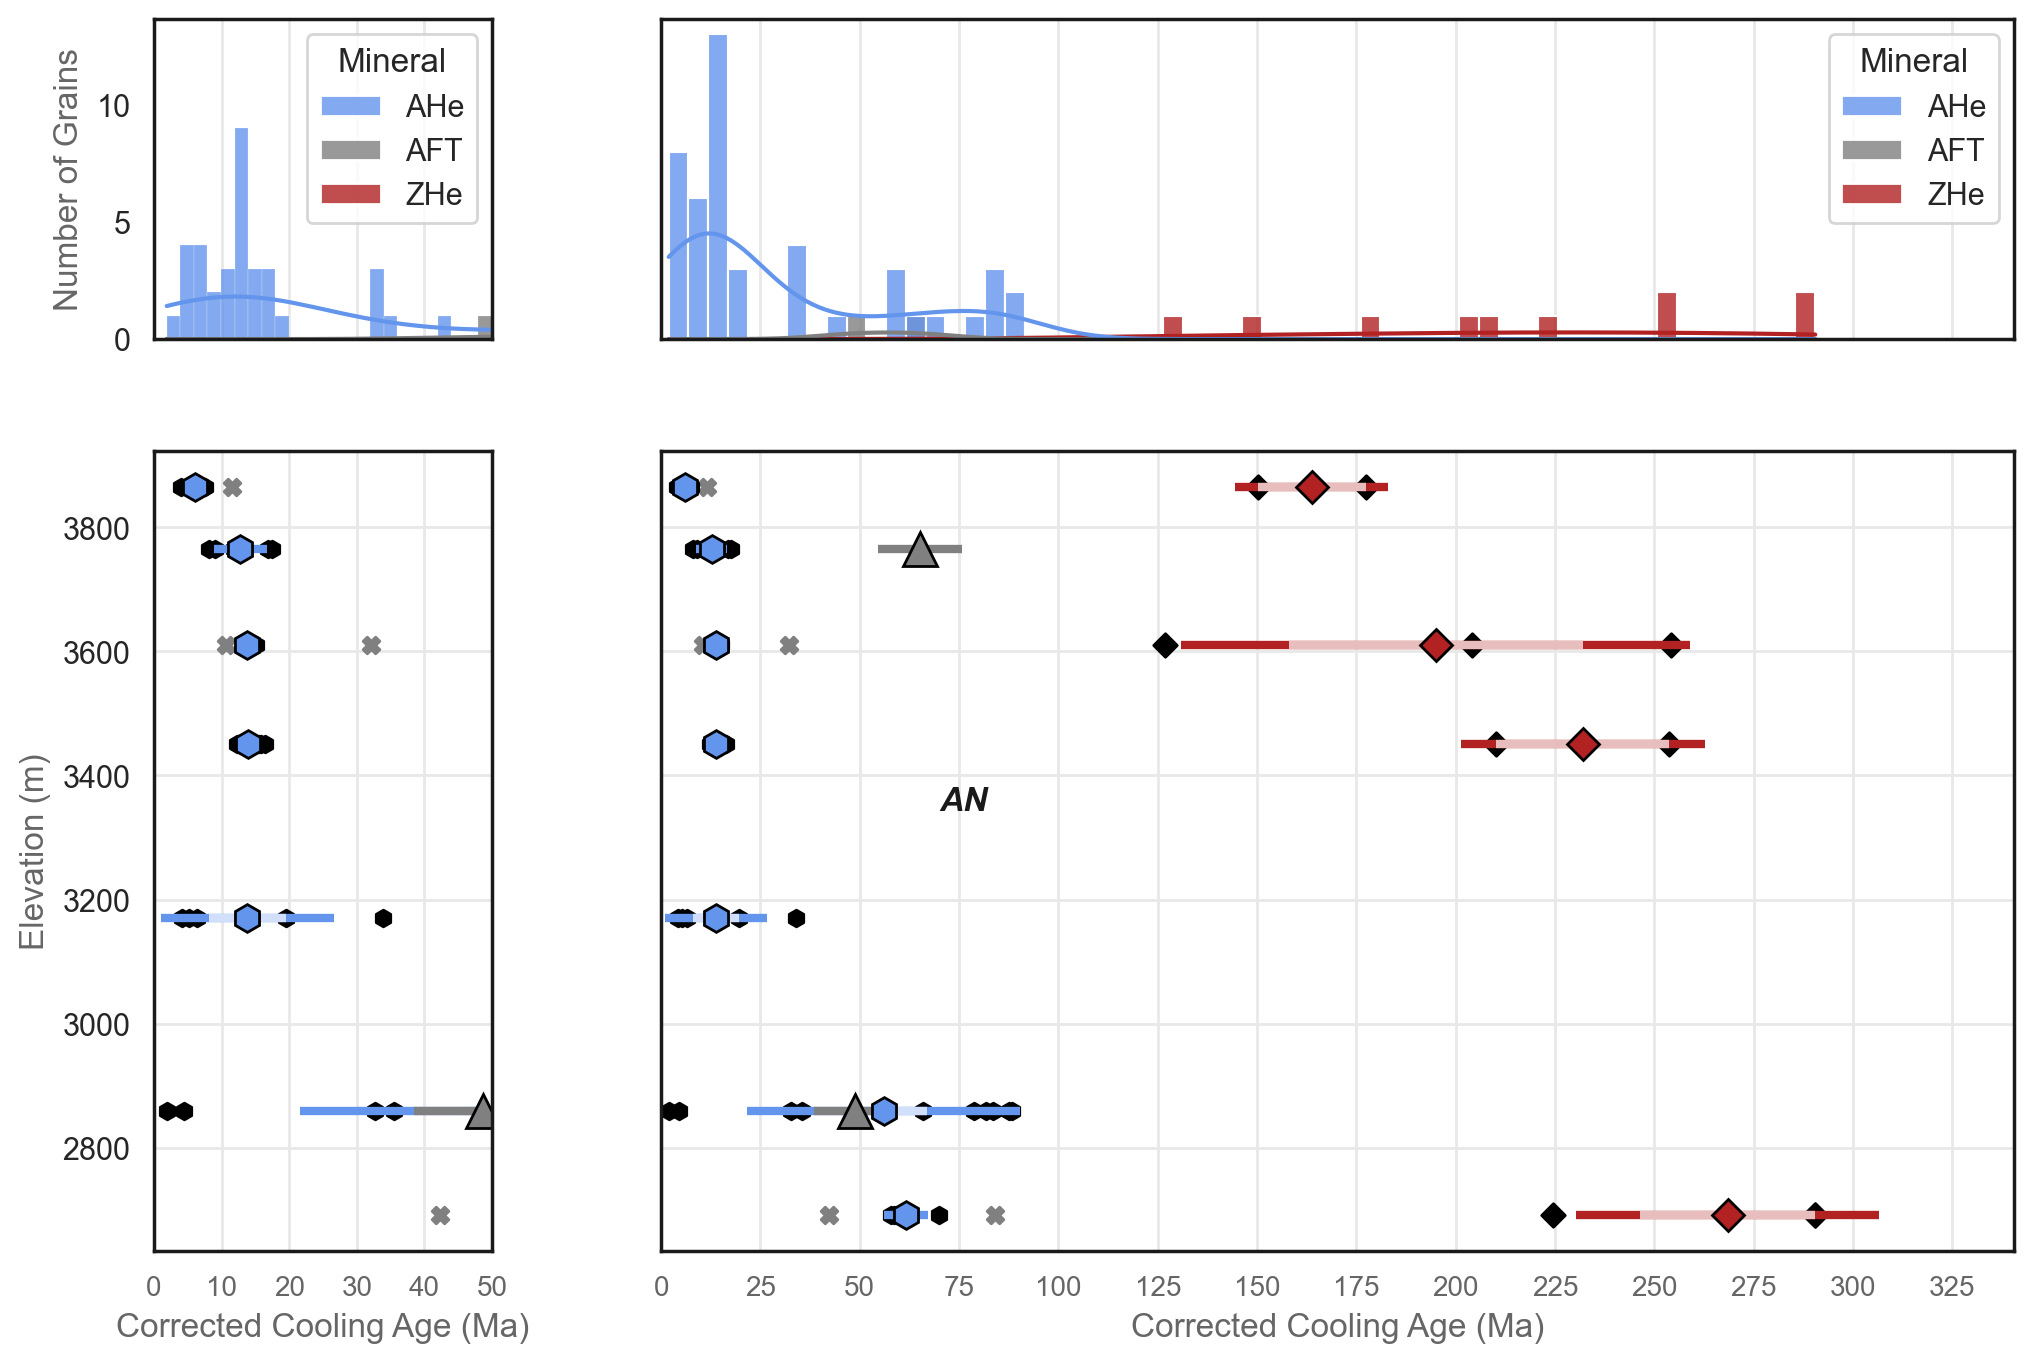

In [6]:
tFunc.plot_AgeVersus_wHistogram_wZoomIn(samples, aliquots, transect, y_variable, inset_xlim, inset_x_interval, 
                       full_x_interval, full_x_bounds, y_bounds, 
                       weightedBy, plot_SE, SE_basedOn,                     
                       insetBinWidth, fullBinWidth, 
                       stat, kde, histLegend,
                       AHeColor, AHeMarker, AHeMarkerSize,
                       ZHeColor, ZHeMarker, ZHeMarkerSize,
                       AFTColor, AFTMarker, AFTMarkerSize,
                       ZFTColor, ZFTMarker, ZFTMarkerSize,
                       AHe_Regression, AHeRegressionColor, excludeAHeSamples,
                       ZHe_Regression, ZHeRegressionColor, excludeZHeSamples,
                       AFTRegression, AFTRegressionColor, excludeAFTSamples,
                       ZFTRegression, ZFTRegressionColor, excludeZFTSamples,
                       label_transects, separateZrLabels, plotDepoAges,
                       savefig, savefigFileName, saveFolder)